<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Keras_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  The sequential model 

In [14]:
# The Sequential class:

from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([ 
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Incrementally building a Sequential model:

medel = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# Calling a model for the first time to bouid it. 

#This Sequential model does not have any weights until we actually call it on some data,
# or call its build() method with an input shape:

# model expects samples of shape(3, ). The None signals that the batch size could be anything. 
model.build(input_shape=(None, 3))

# now we can retrieve the model weights:
model.weights 

In [ ]:
# The summary() method

# After the model is built, we can display its contents via the summary() method:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,420
Trainable params: 6,420
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Naming mdoels and layers with the name argument:

model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_firs_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_firs_layer (Dense)       (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Specifying the input shape of the model is advance:

# use Input to declare the shape of the inputs. The shape argument must be
# the shape of each sampel, not the shape of one batch

model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Use summary() to follow how the output shape of the model changes as we add more layers:

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

In [ ]:
# A simple Functional model with two Dense layers:

# declare an input: this object holds information about the shape and dtype of the data 
# that the model will process:
inputs = keras.Input(shape=(3,), name='my_input')

# the model will process batches where each sample has shape (3, ). 
# The number of samples per batch is variable (None batch size):
inputs.shape

# The batches will have dtype float32:
inputs.dtype

# Such object is called a symbolic tensor. 
# It dosn't contain any actual data, but it encodes the specifications
# of tha actual tensors of data.


tf.float32

In [ ]:
# Create a layer and call it on the input: 
features = layers.Dense(64, activation='relu')(inputs)

# All Keras layers cab be called both on real tensors of data on the 
# symbolic tensors. 
# in the last case they return a new symbolic tensor with updated information:
features.shape


TensorShape([None, 64])

In [ ]:
# After obtaining the final output, we instantiate the model by specifying ints inputs 
# and outputs in the Model constructor:

outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs) 

# The summary of the model: 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# A multi-input, mulit-output Functional model:

vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Define model inputs:
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size), name='text_body')
tags = keras.Input(shape=(num_tags), name='tags')

# Combine input features into a single tensor by concatenating them: 
features = layers.Concatenate()([title, text_body, tags])

# Apply an intermediate layer to recombine input features into richer representations:
features = layers.Dense(64, activation='relu')(features) 

# Define model outputs:
priority = layers.Dense(1, activation='sigmoid', name='priority')(features) 
department = layers.Dense(num_departments, activation='softmax', name='department')(features) 

# Create the model by specifying its inputs and outputs:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department]) 





In [ ]:
# Training a multi-input, multi-output model:
# by providing lists of input and target arrays

import numpy as np 

num_samples = 1280

# dummy input data:
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) 
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy target data:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict( 
    [title_data, text_body_data, tags_data]
)




40/40 [==============================] - 0s 8ms/step


In [ ]:
# Training a model by providing dicts of input and target arrays:

model.compile(optimizer='rmsprop',
              loss={'priority': 'mean_squared_error',
                    'department': 'categorical_crossentropy'},
              metrics={'priority': 'mean_absolute_error',
                       'department': 'accuracy'})

model.fit({'title': title_data, 
           'text_body': text_body_data,
           'tags': tags_data},
          {'priority': priority_data, 
           'department': department_data},
          epochs=1)

model.evaluate({'title': title_data, 
                'text_body': text_body_data,
                'tags': tags_data},
               {'priority': priority_data,
                'department': department_data})

model_preds, department_preds = model.predict( 
    {'title': title_data, 
     'text_body': text_body_data,
     'tags': tags_data} 
)


40/40 [==============================] - 0s 8ms/step


### Access to layer connectivity

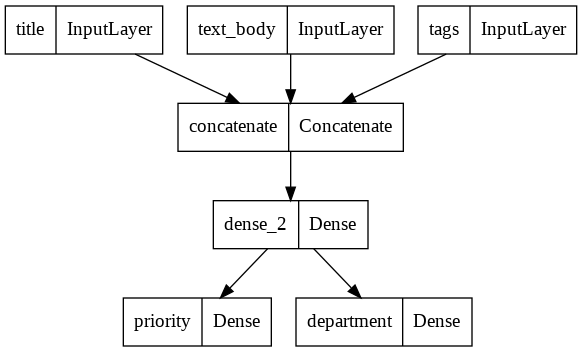

In [ ]:
keras.utils.plot_model(model, 'ticket_classifier.png')

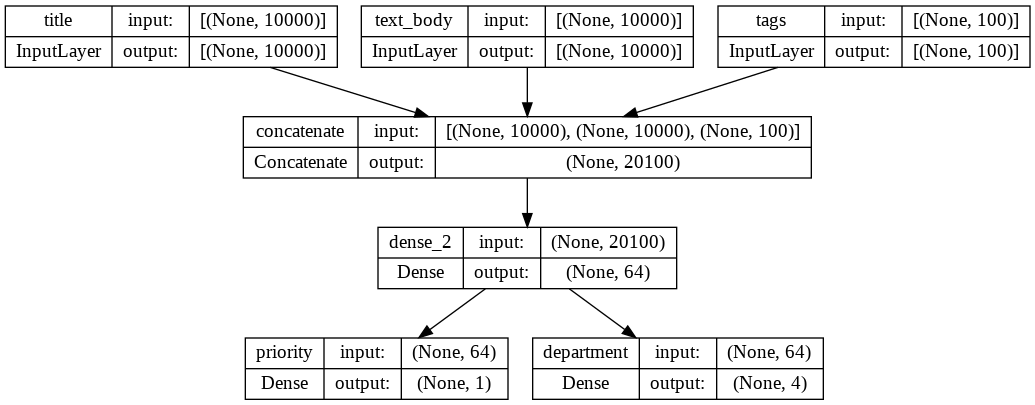

In [ ]:
# Model plot with shape information added: 

keras.utils.plot_model(
    model, 'tickets_classifier_with_shape_info.png', show_shapes=True
)

In [ ]:
# Retrieving the inputs and outputs of a layer in a Functinal nodel:
# this enables us to do feature extraction, creating models that reuse intermediate 
# features from anothe model
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

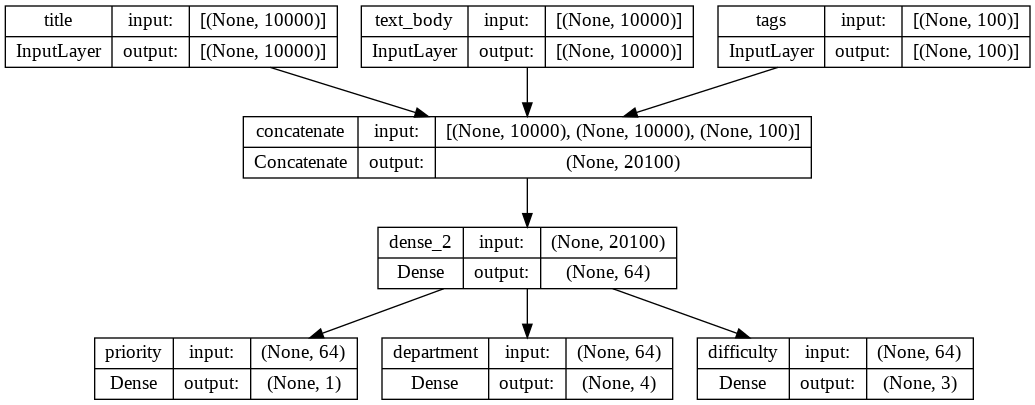

In [ ]:
# Creating a new model by reusing intermediate layer outputs:

fetures = model.layers[4].output  # intermediate Dense layer
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty] 
)

# Plot our new model:

keras.utils.plot_model(
    new_model, 'updated_ticket_classifier.png', show_shapes=True
)

### Subclassing the model class

In [ ]:
# In the __init__ method, define the layers the model will use.
# In the call() method, define the forward pass of the model, reusing the previous layers.
# Instantiate the subclass, and call it on data to create its weights.

class CustomerTicketModel(keras.Model):

  def __init__(self, num_departments):
    super().__init__()     # Always call the super constructor!

    # Define sublayers in constructor:
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_scorer = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(num_departments, activation='softmax') 

  # Define the forward pass in the call method: 
  def call(self, inputs):
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    departemnt = self.department_classifier(features)

    return priority, department 



In [ ]:
# Once you've defined the model, you can instantiate it:

model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data}
)


In [ ]:
# We can train a Model subclass: 

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'], 
              metrics=[['mean_absolute_error'], ['accuracy']])   # should coincide with what you get from returned call(): a list of two elements

# The structure of the input data must match exactly what is expected by the call() method: a dict with keys.
# The structure of the target data must match exaclty what is returned by the call(): a list of two elements. 
model.fit({'title': title_data,
           'text_body': text_body_data,
           'tags': tags_data}, 
          [priority_data, department_data],
          epochs=1) 

model.evaluate({'title': title_data, 
                'text_body': text_body_data,
                'tags': tags_data},
               [priority_data, department_data])

priority_preds, department_preds = model.predict({'title': title_data,
                                                  'text_body': text_body_data,
                                                  'tags': tags_data})



### Mixing and matching different components: 



In [ ]:
# Creating a Functional model that includes a subclassed model:

class Classifier(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else: 
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation) 

  def call(self, inputs):
    return self.dense(inputs) 

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [ ]:
# Creating a subclassed model that includes a Functional model:

inputs = keras.Input(shape=(64, ))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier 

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features) 

model = MyModel() 

### Built-in training and evaluation loops

In [ ]:
# The standard workflow: compile(), fit(), evaluate(), predict(): 

from tensorflow.keras.datasets import mnist 

# Create a model:
def get_mnist_model():
  inputs = keras.Input(shape=(28*28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation='softmax')(features) 
  model = keras.Model(inputs, outputs)
  return model 

# Load the data, reserving some for validation:
(images, labels), (test_images, test_labels) = mnist.load_data() 
images = images.reshape((60000, 28*28)).astype('float32') / 255 
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000] 

# Compile the model:
model = get_mnist_model() 
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, optionaly providing validation data to monitor performance on the unseen data.
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

# Compute the loss and metrics on the new data
test_metrics = model.evaluate(test_images, test_labels) 

# Compute classification probabilities on new data 
predictions = model.predict(test_images) 


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2936 - accuracy: 0.9119 - val_loss: 0.1598 - val_accuracy: 0.9558
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1668 - accuracy: 0.9532 - val_loss: 0.1199 - val_accuracy: 0.9666
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


In [ ]:
# Writing your own metrics: 

# A Keras metric is a subclass of the keras.metrics.Metric class. 
# We need to write the state-update logic ourselves, using update_state() method. 

# Implementing a sustom metric by subclassing the Metric class:

import tensorflow as tf 

class RootMeanSquaredError(keras.metrics.Metric):

  # Define the state variables in the constructor:
  def __init__(self, name='rmse', **kwargs):
    super().__init__(name=name, **kwargs)
    self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros') 
    self.total_samples = self.add_weight(
        name='total_samples', initializer='zeros', dtype='int32') 
    
  # Implement the state update logic: the y_true argument is the targets for one batch,
  # y_pred represents the corresponding predictions from the model. 
  # To match the MNIST model, we expect categorical predictions  and integer labels. 
  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred)) 
    self.mse_sum.assign_add(mse) 
    num_samples = tf.shape(y_pred)[0] 
    self.total_samples.assign_add(num_samples) 

# Use the result() method to return the current value of the metric:
  def result(self):
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32)) 

# Reset the metric state without having to reinstantiate it:
  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0) 

model = get_mnist_model() 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels) 


Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2967 - accuracy: 0.9127 - rmse: 7.1791 - val_loss: 0.1516 - val_accuracy: 0.9561 - val_rmse: 7.3575
Epoch 2/3
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1647 - accuracy: 0.9534 - rmse: 7.3557 - val_loss: 0.1248 - val_accuracy: 0.9666 - val_rmse: 7.4019
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9712 - rmse: 7.4324


### Using callbacks

In [ ]:
# Using callbacks: The Earlystopping and Modelcheckpoint Callbacks:

# To find an optimal number of epochs when the validation loss is no longer improving:
# EarlyStopping callback interrupts training once a target metric has stopped improving. 
# ModelCheckpoint lets you continously save the model during training: 

# Using the callbacks argument in the fit() method:

# Callbacks are passed to the model by means of callback arguments in fit(), 
# which takes a list of callbacks. 
callbacks_list = [ 
    keras.callbacks.EarlyStopping(   # interrupts training when improvement stops
        monitor='val_accuracy',      # monitor the model validation accuracy
        patience=2,                  # interrupts training when accuracy has stopped improving for two epochs
    ),
    keras.callbacks.ModelCheckpoint(      # saves the current weights after every epoch
        filepath='checkpoint_path.keras', # path to the destination model file
        monitor='val_loss',               # keep the best model seen during training 
        save_best_only=True,
    )
]

model = get_mnist_model() 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])    # we monitor accuracy, so it should be part of the model's metrics

# Since the callback will monitor validation loss and accuracy, 
# we need to pass validation_data to the call to fit(): 
model.fit(train_images, train_labels,
          epochs=10, 
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))


# The model has stopped training on the 7th epoch,
# when the validation accurace has stopped improving for the next 2 epochs,
# reaching the max value on the 5th epoch run. 

In [ ]:
# Creating a custom callback by subclassing the Callback class:

from matplotlib import pyplot as plt 

class LossHistory(keras.callbacks.Callback):
  
  def on_train_begin(self, logs):
    self.per_batch_losses = [] 

  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get('loss'))

  def on_epochs_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, 
             label='Training loss for each batch')
    plt.xlabel(f"Batch(epoch {epoch})")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"plot_at_epoch_{epoch}")
    self.per_batch_losses = [] 

In [ ]:
model = get_mnist_model() 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, 
          epochs=10, 
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels)
          ) 

In [ ]:
# Monitoring and visualizing with TensorBoard: 

%load_ext tensorboard 


model = get_mnist_model() 

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = e.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(train_images, train_labels,
          epochs=10, 
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

### Writing your own training and evaluation loops

In [ ]:
# Low-level usage of metrics: 

# A supervised-learning training step:

def train_step(inputs, targets):
  with tf.GradientTape() as tape: 
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradients(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(model.trainable_weights, gradients))
  

In [ ]:
# Keras metrics:

metric = keras.metrics.SparseCategoricalAccuracy() 
targets = [0, 1, 2] 
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()

print(f"result: {current_result:.2f}")

result: 1.00


In [ ]:
# Track the average of a scalar value (model loss): 

values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean() 
for value in values: 
  mean_tracker.update_state(value) 
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


In [15]:
# Writing a step-by-step training loop: the training step function

# Combine forward pass, backward pass, and metrics tracking 
# into a fit()-like training step function: 

model = get_mnist_model() 

loss_fn = keras.losses.SparseCategoricalCrossentropy()   # prepare the loss function 
optimizer = keras.optimizers.RMSprop()                   # prepare the optimizer 
metrics = [keras.metrics.SparseCategoricalAccuracy()]    # prepare the list of metrics to monitor
loss_tracking_metric = keras.metrics.Mean()              # prepare a Mean metric tracker to keep track of the loss average

def train_step(inputs, targets):
  with tf.GradientTape() as tape:  
    predictions = model(inputs, training=True)           # run the forward pass 
    loss = loss_fn(targets, predictions)  

  gradients = tape.gradient(loss, model.trainable_weights)           # run the backward pass 
  optimizer.apply_gradients(zip(gradients, model.trainable_weights)) 
 
  logs = {} 
  for metric in metrics: 
    metric.update_state(targets, predictions)            # keep track of metrics 
    logs[metric.name] = metric.result() 

  loss_tracking_metric.update_state(loss)                # keep track of the loss average 
  logs['loss'] = loss_tracking_metric.result() 

  return logs                                            # return the current values of the metrics and the loss 

In [16]:
# Writing a step-by-step training loop: resetting the metrics: 

# We will need to reset the state of our metrics at the start of each epoch and before running evaluation:

def reset_metrics(): 
  for metric in metrics:  
    metric.reset_state() 
  loss_tracking_metric.reset_state() 

In [17]:
# Writing a step-by-step training loop: the loop itself: 
import tensorflow as tf
# User tf.data.Dataset object to turn the NumPy data into an iterator that iterates over the batches of size 32:
training_dataset = tf.data.Dataset.from_tensor_slices( 
    (train_images, train_labels)
)
training_dataset = training_dataset.batch(32) 

epochs = 3 
for epoch in range(epochs): 
  reset_metrics() 
  for inputs_batch, targets_batch in training_dataset: 
    logs = train_step(inputs_batch, targets_batch) 
  print(f"Results at the end of epoch {epoch}")
  for key, value in logs.items(): 
    print(f"... {key}: {value:.4f}") 

Results at the end of epoch 0
... sparse_categorical_accuracy: 0.9143
... loss: 0.2916
Results at the end of epoch 1
... sparse_categorical_accuracy: 0.9543
... loss: 0.1662
Results at the end of epoch 2
... sparse_categorical_accuracy: 0.9624
... loss: 0.1404


In [19]:
# Writing a step-by-step evaluation loop: 

# repeatedly calls a test_step() function, 
# which processes a single batch of data:

def test_step(inputs, targets): 
  predictions = model(inputs, training=False)  
  loss = loss_fn(targets, predictions) 

  logs = {} 
  for metric in metrics:  
    metric.update_state(targets, predictions) 
    logs['val_' + metric.name] = metric.result() 
  loss_tracking_metric.update_state(loss) 
  logs['val_loss'] = loss_tracking_metric.result() 
  return logs  

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)) 
val_dataset = val_dataset.batch(32)  

reset_metrics() 

for inputs_batch, targets_batch in val_dataset:  
  logs = test_step(inputs_batch, targets_batch) 

print("Evaluation results: ") 
for key, value in logs.items(): 
  print(f"...{key}: {value:.4f}") 


Evaluation results: 
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1270
